In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp "/content/drive/MyDrive/Personal/Learning/ML/Projects/Loan Prediction/LoanData.csv" "./"

In [ ]:
# cp, mv, rm, vim, ls, ll, permissions in linux - ubuntu

## Importing Libraries

In [ ]:
# for numerical operations
import numpy as np

# for dataframe operations
import pandas as pd

# data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning algorithms
import sklearn
import imblearn # used to balance datasets

## Reading the Dataset

In [ ]:
# lets import the dataset using the read_csv function
data = pd.read_csv('LoanData.csv')

# lets check the shape of the dataset
data.shape

(614, 13)

In [ ]:
# lets check the column names present in the dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# lets check the head of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Descriptive Statistics

In [ ]:
# for numerical columns
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# for categorical variables
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
# Output class looks imbalanced 
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Data Cleaning

In [ ]:
# checking no. of Missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# using mode values to impute categorical columns

def fillWithMode(SeriesObj):
    return SeriesObj.fillna(SeriesObj.mode()[0])

# Mean - Outliers are included, can be skewed 
# Median - Outliers are not included
def fillWithMedian(SeriesObj):
    return SeriesObj.fillna(SeriesObj.median())

mode_fill_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in mode_fill_cols:
    data[col] = fillWithMode(data[col])

# using median values to impute the numerical columns
# Exercise - Fill With KNN Imputer 

median_fill_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# lets check if there is any null values left or not
for col in median_fill_cols:
    data[col] = fillWithMedian(data[col])

In [ ]:
fill_missing_collection = {}

for col in mode_fill_cols:
    fill_missing_collection[col] = data[col].mode()[0]

for col in median_fill_cols:
    fill_missing_collection[col] = data[col].median()

fill_missing_collection

{'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '0',
 'Self_Employed': 'No',
 'LoanAmount': 128.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0}

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


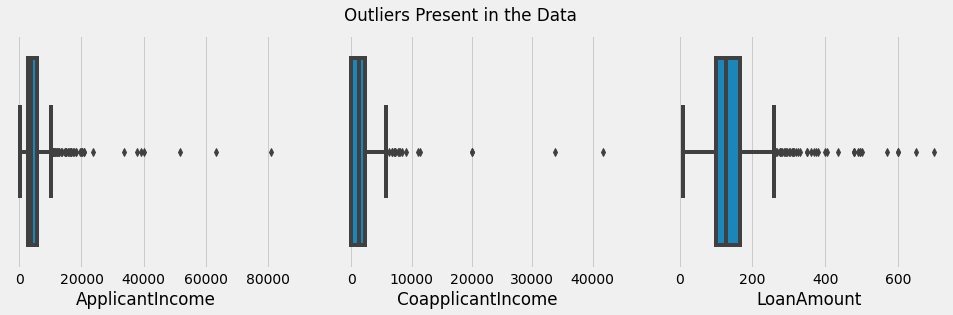

In [ ]:
# lets visualize the outliers using Box Plot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

# 1 row, 3 columns
plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers Present in the Data')
plt.show()

In [ ]:
# box - outliers, 0 quartile, 25 quartile, 50 quartile, 75 quarile, 100 quartile, outliers

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
from sklearn.impute import KNNImputer

OUTLIERS_DETECT = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
NUMERICAL_COLS = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

def DetectOutlier_ZScore(data, col_name, numerical_cols):
    col_values = data.loc[:, col_name] # series object
    upper_limit = col_values.mean() + 3*col_values.std()
    lower_limit = col_values.mean() - 3*col_values.std()

    print(" Upper Limit :", upper_limit, " Lower Limit :", lower_limit)

    outliers = np.logical_or(col_values.values > upper_limit, col_values.values < lower_limit) # vector of booleans 
    idxs = np.where(outliers)[0]

    print(" Outliers Detected : ", len(idxs))

    plt.plot([upper_limit]*data.shape[0])
    plt.plot([lower_limit]*data.shape[0])
    plt.scatter(x = [i for i in range(data.shape[0])] , y = col_values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()

    print(" Fixing Outliers ")
    data.loc[idxs, col_name] = np.nan # converting outliers to nulls 
    imputer = KNNImputer() # pickle, saves objects
    data.loc[:, numerical_cols] = imputer.fit_transform(data.loc[:, numerical_cols])

    plt.plot([upper_limit]*data.shape[0])
    plt.plot([lower_limit]*data.shape[0])
    plt.scatter(x = [i for i in range(data.shape[0])] , y = data.loc[:, col_name].values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()

    return data

 Upper Limit : 23730.584303549156  Lower Limit : -12923.66573677391
 Outliers Detected :  8


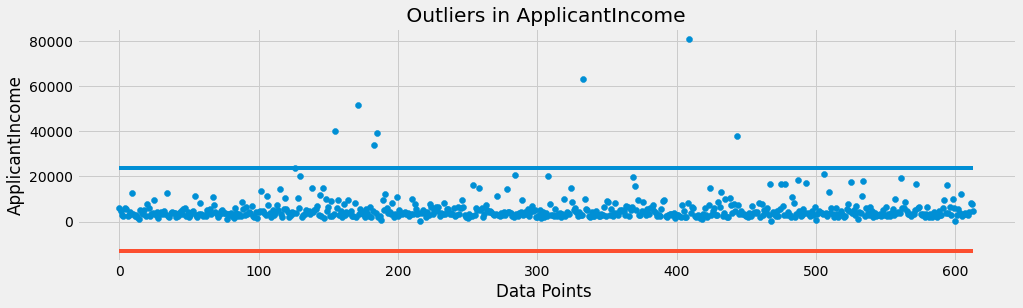

 Fixing Outliers 


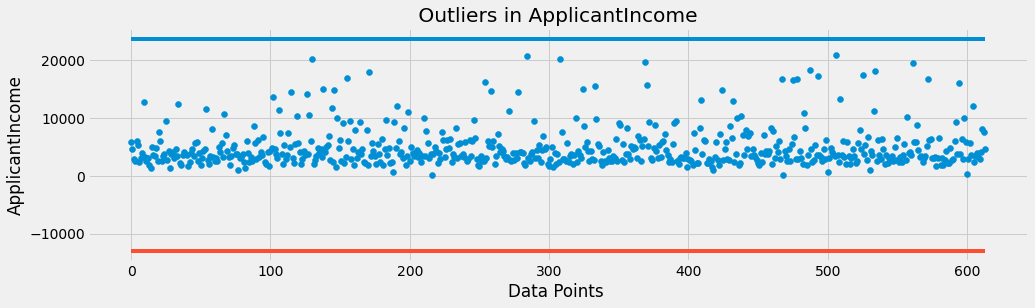

 Upper Limit : 10399.990905699668  Lower Limit : -7157.4993096454655
 Outliers Detected :  6


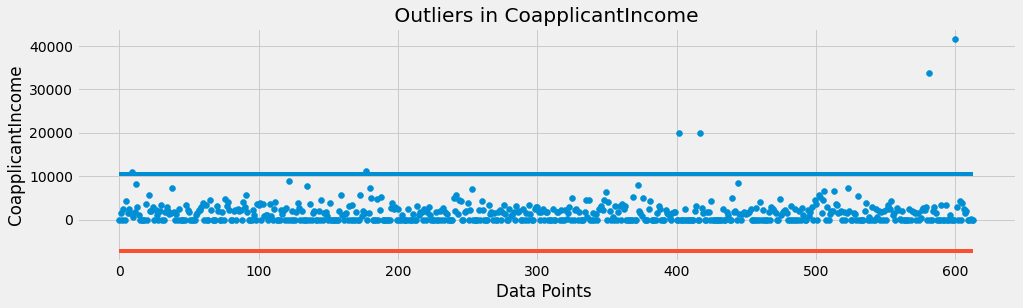

 Fixing Outliers 


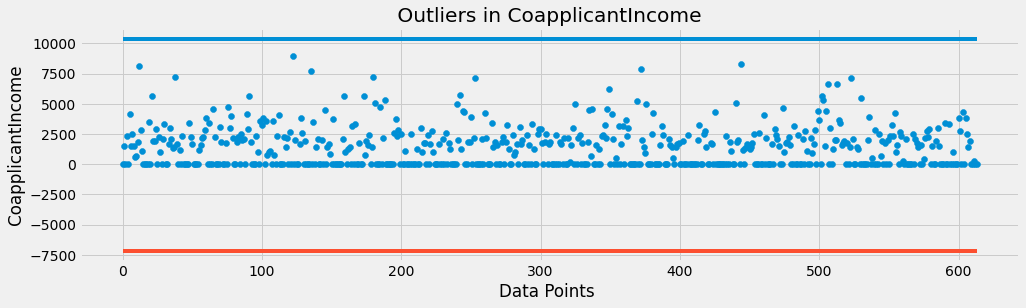

 Upper Limit : 398.0741431380211  Lower Limit : -106.56925714453575
 Outliers Detected :  15


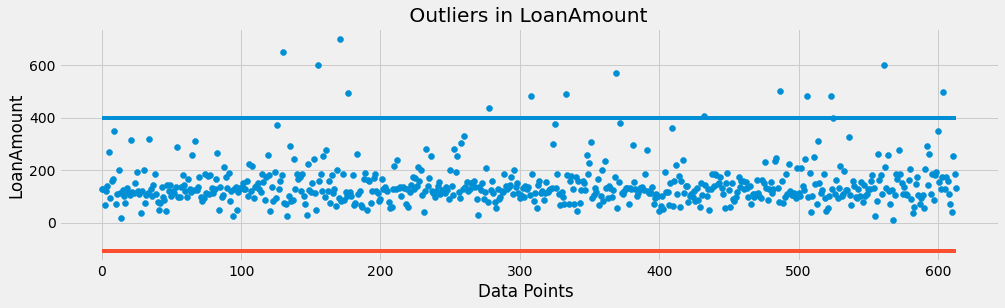

 Fixing Outliers 


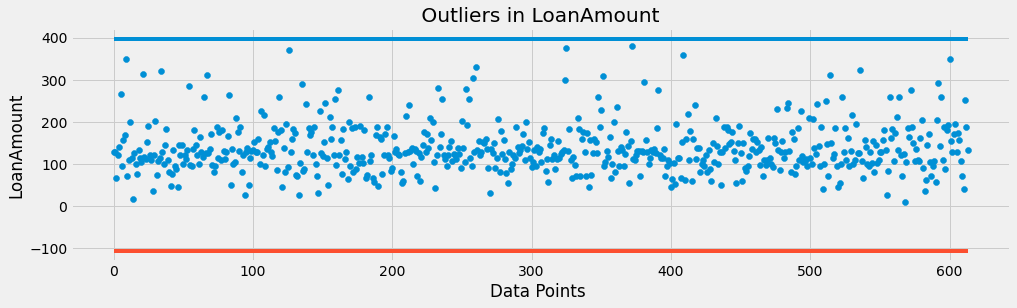

In [ ]:
for col in OUTLIERS_DETECT:
    data = DetectOutlier_ZScore(data, col, NUMERICAL_COLS)

## Univariate Data Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

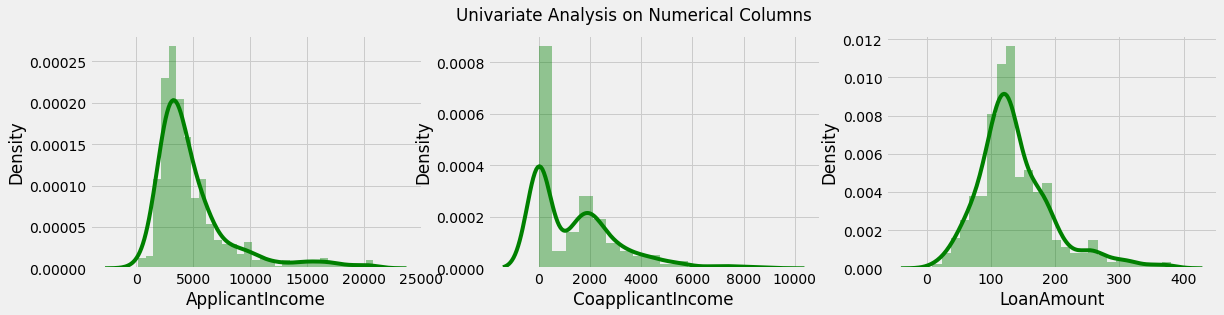

In [ ]:
# Univariate Analysis on Numerical Columns

plt.rcParams['figure.figsize'] = (18, 4)
plt.subplot(1,3, 1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1,3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1,3, 3)
sns.distplot(data['LoanAmount'], color = 'green')

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [ ]:
# close to 0 is good
data['CoapplicantIncome'].skew()

1.3686902161491719

In [ ]:
np.sqrt(data['CoapplicantIncome']).skew()

0.24880138730710258

In [ ]:
np.cbrt(data['CoapplicantIncome']).skew()

-0.0009471027274289659

In [ ]:
np.log1p(data['CoapplicantIncome']).skew()

-0.18351156253254125

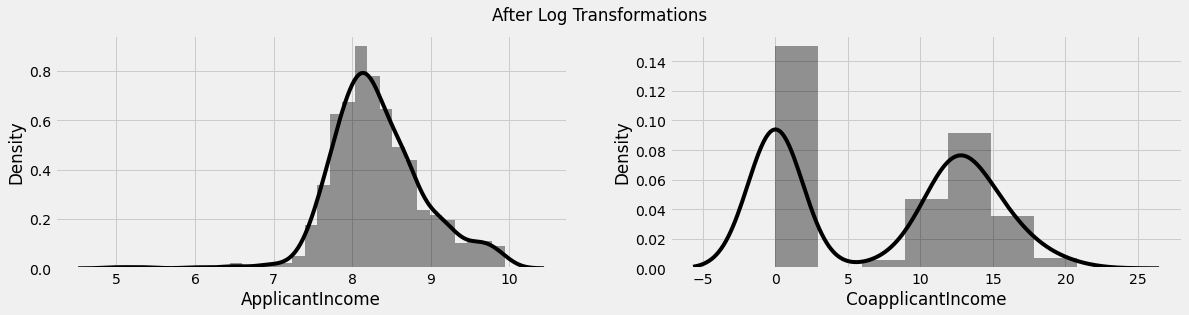

In [ ]:
# lets remove skewness from ApplicantIncome and Coapplicant Income, as it can add bias to the data

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 4)

# lets apply log transformation to remove skewness
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.cbrt(data['CoapplicantIncome'])

# lets plot them and check whether the skewness is removed or not
plt.subplot(1, 2, 1)
sns.distplot(data['ApplicantIncome'], color = 'black')

plt.subplot(1, 2, 2)
sns.distplot(data['CoapplicantIncome'], color = 'black')

plt.suptitle('After Log Transformations')
plt.show()

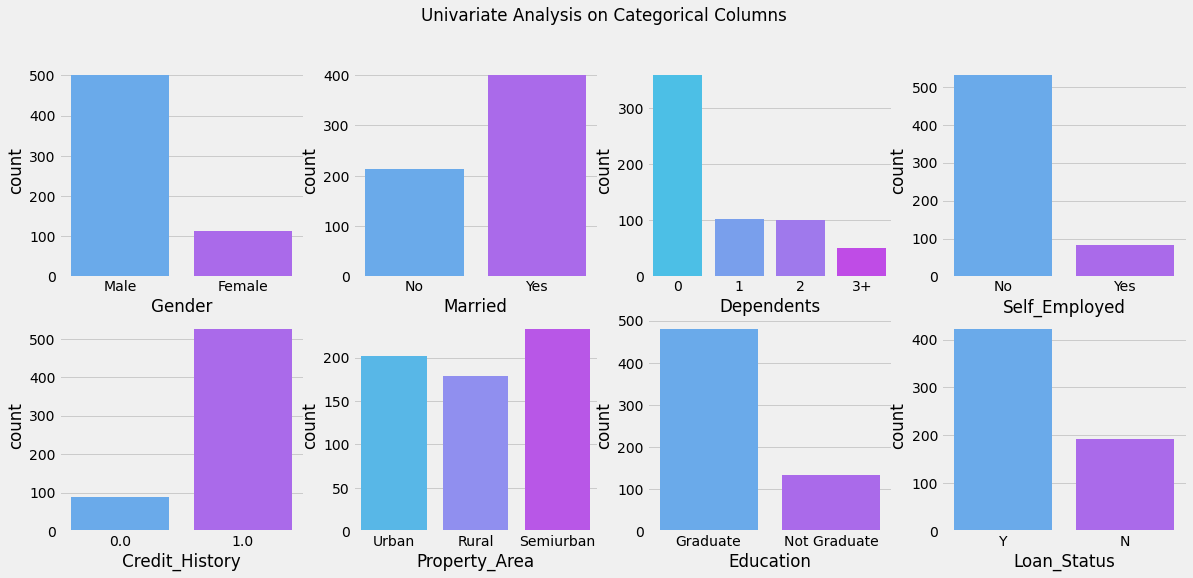

In [ ]:
## Univariate Analysis on Categorical Columns

plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2, 4, 1)
sns.countplot(data['Gender'], palette = 'cool')

plt.subplot(2, 4, 2)
sns.countplot(data['Married'], palette = 'cool')

plt.subplot(2, 4, 3)
sns.countplot(data['Dependents'], palette = 'cool')

plt.subplot(2, 4, 4)
sns.countplot(data['Self_Employed'], palette = 'cool')

plt.subplot(2, 4, 5)
sns.countplot(data['Credit_History'], palette = 'cool')

plt.subplot(2, 4, 6)
sns.countplot(data['Property_Area'], palette = 'cool')

plt.subplot(2, 4, 7)
sns.countplot(data['Education'], palette = 'cool')

plt.subplot(2, 4, 8)
sns.countplot(data['Loan_Status'], palette = 'cool')

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

### Bivariate Data Analysis

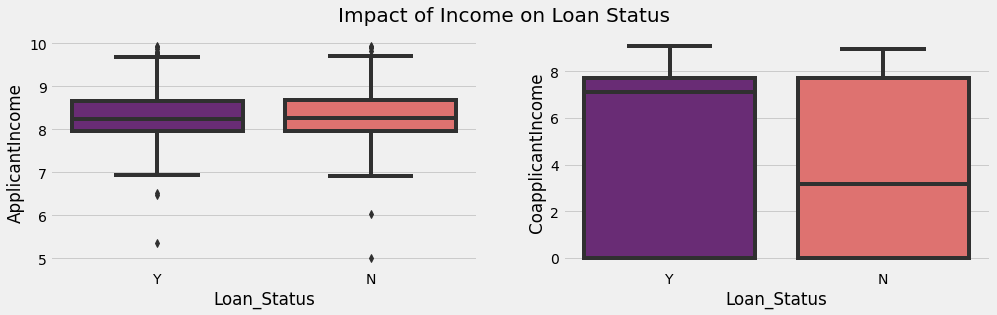

In [ ]:
### Lets check the Impact of Income of Applicant and Co-applicant on Loan Status

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.boxplot(data['Loan_Status'], data['ApplicantIncome'], palette = 'magma')

plt.subplot(1, 2, 2)
sns.boxplot(data['Loan_Status'], data['CoapplicantIncome'], palette = 'magma')

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 20)
plt.show()

### Comparing Categorical Data with Target Columns

In [ ]:
# lets compare all the Categories with respect to the Loan Status to understand the Overall Impact

print("Impact of Marraige on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Married']))
print('\n')

print("Impact of Dependents on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Dependents']))
print('\n')

print("Impact of Education on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Education']))
print('\n')

print("Impact of Employment on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
print('\n')

print("Impact of Property on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Impact of Marraige on Loan Status
Married       No  Yes
Loan_Status          
N             79  113
Y            134  288


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            113  36  25  18
Y            247  66  76  33


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              166   26
Y              366   56


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133


## Data Preparation

In [ ]:
# lets check the columns which are of object data types
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [ ]:
# lets delete the loan Id column from the data as this column has no relation with loan status

# lets check the shape of the data before deleting the columns
print("Before Deleting Columns :", data.shape)

data = data.drop(['Loan_ID'], axis = 1)

# lets check the shape of the data after deleting the columns
print("After Deleting Columns :", data.shape)

Before Deleting Columns : (614, 13)
After Deleting Columns : (614, 12)


In [ ]:
# lets encode other columns

# Label Encoder - Non Quantifyable (male, female)
# High, medium, low | Yes, No | tier1, tier2, tier3 -> manual replace 

data['Gender'] = data['Gender'].replace(('Male','Female'),(1, 0)) # label encoder
data['Married'] = data['Married'].replace(('Yes','No'),(1, 0))
data['Education'] = data['Education'].replace(('Graduate','Not Graduate'), (1, 0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes','No'), (1, 0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'), (1, 0))

# as seen above that Urban and Semi Urban Property have very similar Impact on Loan Status, so, we will merge them together
data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban', 'Rural'),(1, 1, 0))

# as seen above that apart from 0 dependents, all are similar hence, we merge them to avoid any confusion
data['Dependents'] = data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 1, 1))

# lets check whether there is any object column left
data.select_dtypes('object').columns

Index([], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


In [ ]:
# lets split the Target column from the Data

y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

# lets check the shape of x and y
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (614, 11)
Shape of y : (614,)


### Resampling for Balancing the Data

In [ ]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

# Y - 400, N - 100

# (1,0,0,1,0) - N
# (1,2,1,1,0) - N

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y)

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(844, 11)
(844,)


In [ ]:
# lets also check the value counts of our target variable4

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
print(y_resample.value_counts())

Before Resampling :
1    422
0    192
Name: Loan_Status, dtype: int64
After Resampling :
1    422
0    422
Name: Loan_Status, dtype: int64


In [ ]:
x_resample

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,8.674026,0.000000,128.000000,360.0,1.000000,1
1,1,1,1,1,0,8.430109,11.467457,128.000000,360.0,1.000000,0
2,1,1,0,1,1,8.006368,0.000000,66.000000,360.0,1.000000,1
3,1,1,0,0,0,7.856707,13.310098,120.000000,360.0,1.000000,1
4,1,0,0,1,0,8.699515,0.000000,141.000000,360.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
839,0,0,0,0,0,8.057222,0.000000,80.000000,360.0,0.530980,1
840,1,0,0,1,0,8.490190,15.526593,204.027151,360.0,0.621606,0
841,1,0,0,0,0,8.440840,0.000000,95.592365,360.0,0.000000,1
842,0,0,0,0,0,8.173447,0.000000,95.799546,360.0,1.000000,0


In [ ]:
columns_sequence = list(x_resample.columns)

In [ ]:
# lets split the test data from the training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 4)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (675, 11)
Shape of the y Train : (675,)
Shape of the x Test : (169, 11)
Shape of the y Test : (169,)


## Machine Learning Modelling

In [ ]:
# lets apply Logistic Regression

# 1 Epoch (1 Iter) = 1 Foreward prop + 1 Backward prop
# Foreward prop - X -> Predictions -> Loss
# Backward prop - Loss -> Update weights 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train) # please train on x_train, y_train

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.7703703703703704
Testing Accuracy : 0.7633136094674556


In [ ]:
np.abs(model.coef_)

array([[6.75335810e-02, 7.73354270e-01, 3.34315613e-01, 8.01224350e-01,
        7.04791446e-01, 1.20943155e-01, 3.98598377e-02, 6.62132146e-03,
        9.40099875e-04, 3.81864695e+00, 8.07357304e-01]])

In [ ]:
columns_sequence

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [ ]:
# Confusion
# 1. Actual -> 0, Pred -> 0 (True Negative) [right]
# 2. Actual -> 1, Pred -> 1 (True Positive) [right]
# 3. Actual -> 0, Pred -> 1 (False Positive) [wrong]
# 4. Actual -> 1, Pred -> 0 (False Negative) [wrong]

# precision = TP/(TP + FP) | when FP is important
# recall = TP/(TP + FN) | when FN is important
# f1 score = harmonic mean of precision and recall = 2/((1/p) + (1/r))

# precision = how many are predicted correct/total prediction count 
# recall = how many are predicted correct/total actual count 

# recall (0) = how many 0's are predicted as 0's/total actual 0's -> 70/100
# precision (0) = how many 0's are predicted as 0's/total predictions as 0's

In [ ]:
# metrics - 
# 1. Accuracy 
# 2. Confusion matrix 
# 3. classification report 

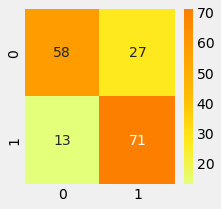

              precision    recall  f1-score   support

           0       0.82      0.68      0.74        85
           1       0.72      0.85      0.78        84

    accuracy                           0.76       169
   macro avg       0.77      0.76      0.76       169
weighted avg       0.77      0.76      0.76       169



In [ ]:
# lets analyze the Performance using Confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
# A person who shouldn't get a Loan, Predictions says Y (FP)
# A person who should get a loan, Prediction says N (FN)

In [ ]:
# lets apply Random Forest

# 1 Epoch (1 Iter) = 1 Foreward prop + 1 Backward prop
# Foreward prop - X -> Predictions -> Loss
# Backward prop - Loss -> Update weights 

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(min_samples_split=7)
model.fit(x_train, y_train) # please train on x_train, y_train

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.96
Testing Accuracy : 0.8461538461538461


In [ ]:
model.feature_importances_

array([0.01861404, 0.04065081, 0.0254701 , 0.04043599, 0.0158745 ,
       0.15660365, 0.10586153, 0.16399587, 0.03047537, 0.36236897,
       0.03964916])

In [ ]:
columns_sequence

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

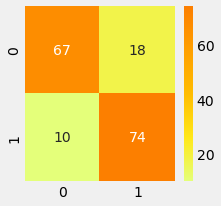

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        85
           1       0.80      0.88      0.84        84

    accuracy                           0.83       169
   macro avg       0.84      0.83      0.83       169
weighted avg       0.84      0.83      0.83       169



In [ ]:
# lets analyze the Performance using Confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

### Applying Gradient Boosting

In [ ]:
# lets apply DecisionTrees

from sklearn.ensemble import GradientBoostingClassifier

model =  GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.922962962962963
Testing Accuracy : 0.7988165680473372


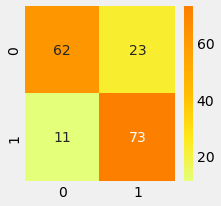

              precision    recall  f1-score   support

           0       0.85      0.73      0.78        85
           1       0.76      0.87      0.81        84

    accuracy                           0.80       169
   macro avg       0.80      0.80      0.80       169
weighted avg       0.81      0.80      0.80       169



In [ ]:
# lets analyze the Performance using Confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
from sklearn.model_selection import cross_val_score # Splits data into N parts, where every part has Training and Testing sets 
# Returns model.score on each split 
# 1. We want scores on all splits to be uniform
# 2. Final score can be considered as average of all scores 

clf = RandomForestClassifier(n_estimators=500, min_samples_split=3, min_samples_leaf=3, max_features=0.2)
scores = cross_val_score(clf, x_train, y_train, cv=5)
print(scores)

[0.78518519 0.75555556 0.77777778 0.80740741 0.77777778]


In [ ]:
np.mean(scores)

0.7807407407407407

In [ ]:
# 1. Training and Validation 
# 2. Deploy 

In [ ]:
testing_data = pd.read_csv("/content/LoanData.csv")
testing_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
try:
    1/0
except:
    print(" I think there's an error ")

 I think there's an error 


In [ ]:
def DoPrediction(sample):
    print(" Actual Answer : ", sample['Loan_Status'])
    del sample['Loan_Status']
    del sample['Loan_ID']

    for col, value in sample.items():
        try:
            if np.isnan(value):
                sample[col] = fill_missing_collection[col]
        except:
            continue

    # for col in data.columns:
    #     if data[col].isnull().sum():
    #         data[col].fillna(value = fill_missing_collection[col])

    sample['ApplicantIncome'] = np.log(sample['ApplicantIncome'])
    sample['CoapplicantIncome'] = np.cbrt(sample['CoapplicantIncome'])

    sample['Gender'] = 1 if sample['Gender'] == 'Male' else 0
    sample['Married'] = 1 if sample['Married'] == 'Yes' else 0
    sample['Education'] = 1 if sample['Education'] == 'Graduate' else 0
    sample['Self_Employed'] = 1 if sample['Self_Employed'] == 'Yes' else 0
    sample['Property_Area'] = 1 if sample['Property_Area'] in ['Urban','Semiurban'] else 0 
    sample['Dependents'] = 1 if sample['Dependents'] in ['1', '2', '3+'] else 0

    vector = np.array([sample[col] for col in columns_sequence]).reshape(1,11) # (1,C)
    prediction = model.predict(vector) # 0 or 1
    prediction = 'Y' if prediction == 1 else 'N'
    print(" Predicted Answer : ", prediction)

In [ ]:
idx = np.random.randint(testing_data.shape[0]) # can you get me a random row
sample = dict(testing_data.iloc[idx, :])

print(sample)

DoPrediction(sample)

{'Loan_ID': 'LP002618', 'Gender': 'Male', 'Married': 'Yes', 'Dependents': '1', 'Education': 'Not Graduate', 'Self_Employed': 'No', 'ApplicantIncome': 4050, 'CoapplicantIncome': 5302.0, 'LoanAmount': 138.0, 'Loan_Amount_Term': 360.0, 'Credit_History': nan, 'Property_Area': 'Rural', 'Loan_Status': 'N'}
 Actual Answer :  N
 Predicted Answer :  N


In [ ]:
# youtube - stanford ml, jemery howard (3 weeks) [fastai ML]
# coursera - deeplearning.ai - ML, [Deeplearning spec]
# udemy - lazyprogrammer [complex] (17 coursers)

In [ ]:
# arjunabhi09@gmail.com